In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df= pd.read_csv("song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
song_names = df['song_name'].tolist()
codigos = {}
resultado = []
for valor in song_names:
    if valor not in codigos:
        codigos[valor] = len(codigos) + 1
    resultado.append(codigos[valor])

df['song_code'] = resultado


In [5]:
data_copia = df.copy()
data_copia['song_name'] = resultado

In [6]:
# 1. Crear una copia del DataFrame original
data2 = df.copy()

# 2. Recorrer todas las columnas del DataFrame
for columna in data2.columns:

    # 3. Verificar si la columna es de tipo object (texto / categórica)
    if data2[columna].dtype == 'object':

        codigos = {}              # Diccionario para asignar códigos únicos
        codificada = []           # Lista para guardar los valores numéricos

        for valor in data2[columna]:
            if valor not in codigos:
                codigos[valor] = len(codigos) + 1
            codificada.append(codigos[valor])

        # 4. Reemplazar directamente en la copia
        data2[columna] = codificada
data2.head()
data2.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_code'],
      dtype='object')

In [7]:
import statsmodels.api as sm

data4 = data2[['song_popularity', 'danceability', 'energy', 'loudness',
               'speechiness', 'acousticness', 'instrumentalness',
               'audio_valence', 'tempo']]

# Convertir la variable dependiente en binaria
data4 = data4.copy()
data4['pop_binaria'] = (data4['song_popularity'] >= 60).astype(int)

X = data4.drop(columns=['song_popularity', 'pop_binaria'])
X = sm.add_constant(X)
y = data4['pop_binaria']

modelo = sm.Logit(y, X).fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.658190
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            pop_binaria   No. Observations:                18835
Model:                          Logit   Df Residuals:                    18826
Method:                           MLE   Df Model:                            8
Date:                Thu, 01 May 2025   Pseudo R-squ.:                 0.03507
Time:                        17:12:58   Log-Likelihood:                -12397.
converged:                       True   LL-Null:                       -12848.
Covariance Type:            nonrobust   LLR p-value:                3.192e-189
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0693      0.176      6.074      0.000       0.724       1.414
danceabilit

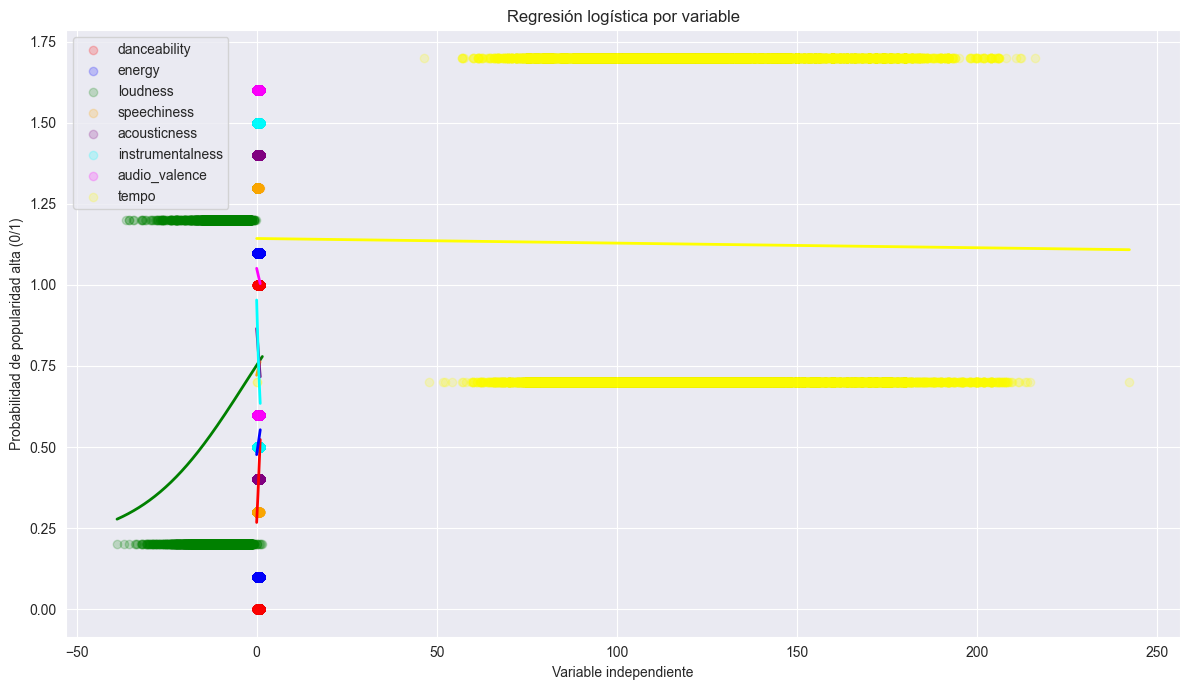

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Convertir la popularidad en binaria: 1 si >=60, 0 si <60
data4['pop_binaria'] = (data4['song_popularity'] >= 60).astype(int)

plt.figure(figsize=(12, 7))
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
variables = data4.columns.drop(['song_popularity', 'pop_binaria'])

for i, var in enumerate(variables):
    x = data4[var].values.reshape(-1, 1)
    y = data4['pop_binaria'].values

    # Ajustar regresión logística
    model = LogisticRegression()
    model.fit(x, y)

    # Generar curva
    x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
    y_pred = model.predict_proba(x_range)[:, 1]

    # Graficar puntos y curva
    plt.scatter(x, y + i * 0.1, color=colores[i % len(colores)], alpha=0.2, label=var)  # con desplazamiento
    plt.plot(x_range, y_pred + i * 0.1, color=colores[i % len(colores)], linewidth=2)

plt.xlabel('Variable independiente')
plt.ylabel('Probabilidad de popularidad alta (0/1)')
plt.title('Regresión logística por variable')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Matriz de confusión:
[[14348    36]
 [ 4425    26]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     14384
           1       0.42      0.01      0.01      4451

    accuracy                           0.76     18835
   macro avg       0.59      0.50      0.44     18835
weighted avg       0.68      0.76      0.66     18835



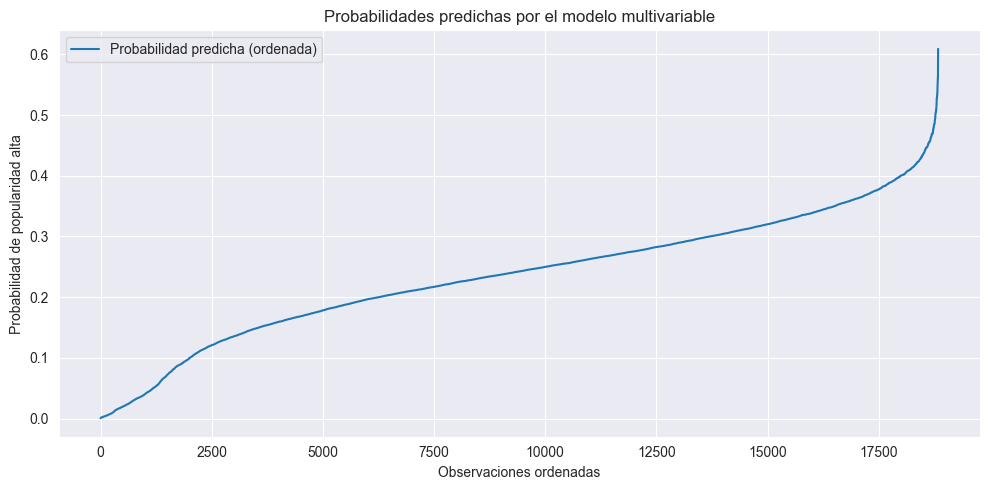

In [14]:
variables = ['danceability', 'energy', 'loudness', 'speechiness',
             'acousticness', 'instrumentalness', 'audio_valence', 'tempo']

# Escalar los datos
scaler = MinMaxScaler()
data4[variables] = scaler.fit_transform(data4[variables])

# Crear variable binaria objetivo
data4['pop_binaria'] = (data4['song_popularity'] >= 70).astype(int)

# Separar X e y
X = data4[variables]
y = data4['pop_binaria']

# Entrenar modelo multivariable
model = LogisticRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y, y_pred))

# Gráfico de probabilidad predicha (ordenado)
plt.figure(figsize=(10, 5))
plt.plot(np.sort(y_prob), label='Probabilidad predicha (ordenada)')
plt.xlabel('Observaciones ordenadas')
plt.ylabel('Probabilidad de popularidad alta')
plt.title('Probabilidades predichas por el modelo multivariable')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()